# Cyclistic Bikeshare Case Study

## #Import the necessary libraries

In [1]:
import pandas as pd               # data manipulation and analysis
import numpy as np                # efficient data types
import matplotlib.pyplot as plt   # plotting visuals
import seaborn as sns             # visualization module
import glob                       # pathnames matching
import os                         # data file path handling
import datetime                   # For date manipulation
import math                       # For math functions
import h3                         # To calculate distance

In [2]:
# Import all csv files and concatenate them into one dataframe.

path = r'C:\Users\Victor Muange\Desktop\Cyclistic Case Study\Bikeshare dataset Apr-2020 to Mar-2021'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
Main_df = pd.concat(df_from_each_file, ignore_index = True)

## Exploring the data for cleaning.

In [3]:
# Prints the top five rows of the data
Main_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
# Check the number of raws in the dataframe.
len(Main_df.index)

3489384

In [5]:
# Get information from our dataframe (number of records, memory use and data types)
Main_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489384 entries, 0 to 3489383
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 2.0 GB


In [6]:
# Get descriptive statistics under each numeric column
Main_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,start_lat,start_lng,end_lat,end_lng
count,3489384.000,3489384.000,3484646.000,3484646.000
mean,41.904,-87.645,41.904,-87.645
std,0.044,0.026,0.044,0.026
min,41.640,-87.870,41.540,-88.070
25%,41.882,-87.659,41.883,-87.659
50%,41.900,-87.642,41.901,-87.643
75%,41.930,-87.628,41.931,-87.628
max,42.080,-87.520,42.160,-87.440


# A. Data cleaning

## Checking for duplicate values

In [7]:
# checking the number of unique values per column
print("Unique values per column")
for col in Main_df.columns:
    print(f"{col}: {Main_df[col].nunique()}")

Unique values per column
ride_id: 3489108
rideable_type: 3
started_at: 2205321
ended_at: 2196019
start_station_name: 708
start_station_id: 1344
end_station_name: 706
end_station_id: 1345
start_lat: 296482
start_lng: 291862
end_lat: 319770
end_lng: 307617
member_casual: 2


### Findig the duplicates for ride_id

In [8]:
def get_duplicates(field: str) -> pd.DataFrame:
    """Display rows with duplicate ride_ids"""
    vc = Main_df[field].value_counts()
    duplicate_index = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicate_index)
    print(f"Number of duplicates for {field}: {n_duplicates}")
    if n_duplicates > 0:
        print("Sample rows:")
        mask = Main_df[field].isin(duplicate_index)
        return Main_df[mask].sort_values(by = field).head()
    return

get_duplicates('ride_id')

Number of duplicates for ride_id: 264
Sample rows:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2829219,021A73F8C18B932D,docked_bike,2020-11-25 16:35:39,2020-11-25 16:48:02,Clark St & Winnemac Ave,325.0,Ravenswood Ave & Berteau Ave,314.0,41.973347,-87.667855,41.957921,-87.673567,member
3006144,021A73F8C18B932D,docked_bike,12/15/2020 12:15,11/25/2020 16:48,Clark St & Winnemac Ave,TA1309000035,Ravenswood Ave & Berteau Ave,TA1309000018,41.973347,-87.667855,41.957921,-87.673567,member
3020020,0334987B57662109,docked_bike,12/15/2020 11:56,11/25/2020 16:22,Broadway & Berwyn Ave,13109,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.978353,-87.659753,41.984037,-87.652310,member
2797158,0334987B57662109,docked_bike,2020-11-25 16:15:04,2020-11-25 16:22:04,Broadway & Berwyn Ave,294.0,Lakefront Trail & Bryn Mawr Ave,459.0,41.978353,-87.659753,41.984037,-87.652310,member
3029795,038CAB4A84D9A56B,docked_bike,12/15/2020 11:57,11/25/2020 16:24,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870769,-87.625734,41.870769,-87.625734,member


## Drop duplicate ride_id

In [9]:
Main_df = Main_df.drop_duplicates(subset=['ride_id'])

In [10]:
# Confirm that duplicate ride_ids were dropped
get_duplicates('ride_id')

Number of duplicates for ride_id: 0


# Check for NaN values

In [11]:
# Check for NaN values in start_station_id
Main_df['start_station_id'].isna().sum()

122723

## Drop NaN values in start_station_id

In [12]:
Main_df = Main_df.dropna(subset=['start_station_id']) 

In [13]:
#Confirm that NaN values were dropped.
Main_df['start_station_id'].isna().sum()

0

In [14]:
# Check for NaN values in end_station_id
Main_df['end_station_id'].isna().sum()

72208

## Drop NaN values in end_station_id

In [15]:
Main_df = Main_df.dropna(subset=['end_station_id'])

In [16]:
#Confirm that NaN values were dropped.
Main_df['end_station_id'].isna().sum()

0

# B. Data Manipulation.
### Adding the necessary columns

## 1. Add a ride_duration column 

In [17]:
# convert time object to datetime

Main_df['started_at'] = Main_df['started_at'].astype('datetime64[ns]')
Main_df['ended_at'] = Main_df['ended_at'].astype('datetime64[ns]')

In [18]:
# Adds ride_duration column
Main_df['ride_duration_mins'] = (((Main_df['ended_at'] - Main_df['started_at']))/pd.Timedelta(minutes=1))

### 2. Add a day column to show which day the ride starts

In [19]:
Main_df['day'] = pd.to_datetime(Main_df['started_at']).dt.day_name()

### 3. Add a month_year column

In [20]:
Main_df['month'] = pd.to_datetime(Main_df['started_at']).dt.strftime('%B-%Y')

### 4. Add a ride_distance column
#### Subtract start and end coordinates

In [21]:
Main_df['ride_distance'] = Main_df.apply(lambda row: h3.point_dist((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng']), unit='km'), axis=1)

In [22]:
# Count number of rows where ride_distance is equal to or less than zero

(Main_df['ride_distance'] <=0).sum()  .sum()

286864

In [23]:
# Count total rows in Main_df
len(Main_df.index)

3294177

In [24]:
# Drop the zero and negative vales in ride_distance
Main_df = Main_df.drop(Main_df[(Main_df['ride_distance'] <=0)].index)

In [25]:
#Check that there are no more zero and negative values in ride_distance
(Main_df['ride_distance'] <=0).sum()  .sum()

0

In [26]:
# Count total rows in Main_df
len(Main_df.index)

3007313

### 5. Add a start_hour column
It helps determine what time of day most riders get the bikes

In [27]:
Main_df['start_hour'] = Main_df['started_at'].dt.hour

In [28]:
Main_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,day,month,ride_distance,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,Sunday,April-2020,3.985733,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,Friday,April-2020,0.978874,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,Wednesday,April-2020,2.987772,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,Tuesday,April-2020,2.136096,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,Saturday,April-2020,9.127519,10


### Extract the seasons from started_at

In [29]:
Main_df['season'] = (Main_df['started_at'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

Main_df['season'] = Main_df['season'].map(seasons)

In [30]:
Main_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,day,month,ride_distance,start_hour,season
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,Sunday,April-2020,3.985733,17,Spring
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,Friday,April-2020,0.978874,17,Spring
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,Wednesday,April-2020,2.987772,17,Spring
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,Tuesday,April-2020,2.136096,12,Spring
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,Saturday,April-2020,9.127519,10,Spring


## #Now the data is clean, we have all the columns we need, and it is ready for analysis.

### Note: At this stage, you can visualize the data using Python, or you can export your data as csv and visualize using Tableau.

In [31]:
# Extract data to show total rides between casuals and members.
Viz_1 = Main_df.groupby(['member_casual']).count()['ride_id']

In [46]:
#Display the data
Viz_1

member_casual
casual    1150000
member    1857313
Name: ride_id, dtype: int64

Members: 1,857,313 
Casuals: 1,150,000


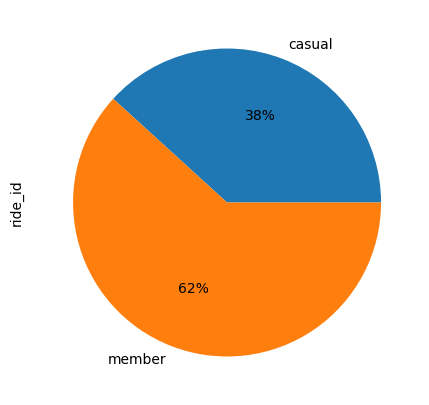

In [32]:
# Plot a pie chart that shows the percentage of total rides between casual riders and members.
print("Members: 1,857,313",
     "\nCasuals: 1,150,000")
plot = Viz_1.plot.pie(autopct='%1.0f%%', figsize=(5, 5))

In [33]:
# Extract data to show total rides between casuals and members per day.
Viz_2 = Main_df.groupby(['day', 'member_casual']).count()['ride_id']

In [47]:
#Display data
Viz_2

day        member_casual
Friday     casual           170850
           member           278140
Monday     casual           118513
           member           241434
Saturday   casual           276122
           member           292032
Sunday     casual           207810
           member           238613
Thursday   casual           134138
           member           272605
Tuesday    casual           115584
           member           257595
Wednesday  casual           126983
           member           276894
Name: ride_id, dtype: int64

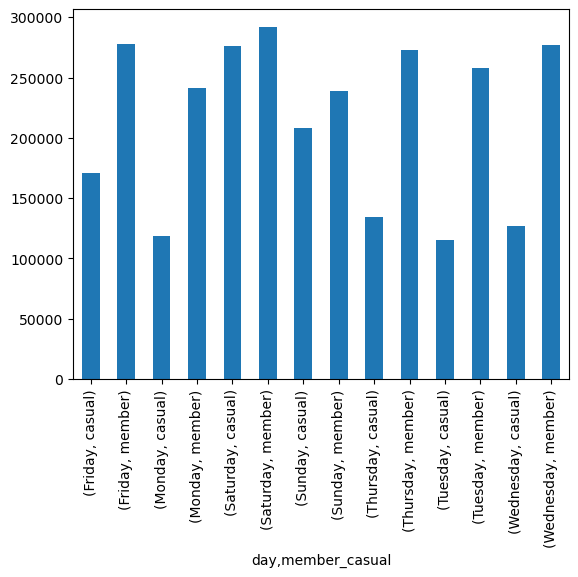

In [65]:
# Plot a line graph to show relationship
lines = Viz_2.plot.bar()

In [53]:
# Extract data to show total rides by the hour of the day bwtween members and casuals.
Viz_3 = Main_df.groupby(['start_hour', 'member_casual']).count()['ride_id']

In [54]:
#Display data
Viz_3

start_hour  member_casual
0           casual            15231
            member            10411
1           casual             9133
            member             5819
2           casual             4841
            member             3056
3           casual             2709
            member             1917
4           casual             2393
            member             3167
5           casual             4174
            member            15965
6           casual            10727
            member            52249
7           casual            19623
            member            87802
8           casual            26799
            member            94851
9           casual            33535
            member            79212
10          casual            47927
            member            83630
11          casual            66540
            member           104166
12          casual            81094
            member           121858
13          casual            87889
  

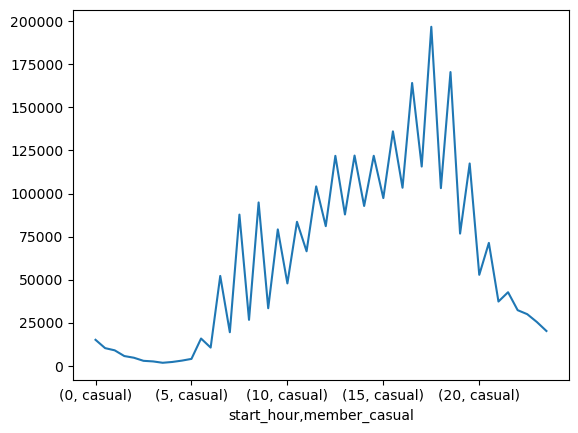

In [61]:
lines = Viz_3.plot.line(x='start_hour', y='ride_id')

In [67]:
# Extract data to show total rides by month bwtween members and casuals.
Viz_4 = Main_df.groupby(['month', 'member_casual']).count()['ride_id']

In [68]:
# Display the data
Viz_4

month           member_casual
April-2020      casual            17258
                member            54974
August-2020     casual           243414
                member           312307
December-2020   casual            22156
                member            86136
February-2021   casual             7570
                member            32635
January-2021    casual            13259
                member            66548
July-2020       casual           217727
                member           268336
June-2020       casual           126883
                member           177379
March-2021      casual            64844
                member           124581
May-2020        casual            64443
                member           102925
November-2020   casual            66670
                member           145693
October-2020    casual           113280
                member           210554
September-2020  casual           192496
                member           275245
Name: ride

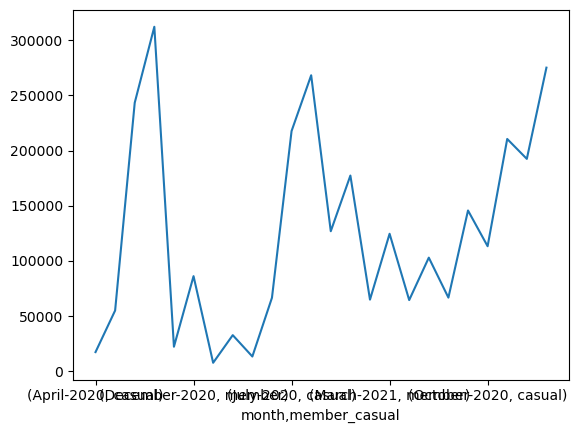

In [70]:
lines = Viz_4.plot.line()